# Visualisation

## Setup

In [19]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [20]:
path = "/home/ipausers/kahane/Wks/AMFtrack/data_width_907_3.json"

with open(path) as f:
    d = json.load(f)

for key in d.keys():
    del d[key]['values']

df = pd.DataFrame(d)
df = df.transpose()

## Visualisation

In [21]:
df

,plate,hypha,pos,order,x,y,value,variance,std_deviation
trunk_001,20220324_Plate907_001,1,middle,9,68260,543000,244,20,4
trunk_002,20220324_Plate907_003,1,middle,8,68540,51840,243,253,15
trunk_003,20220324_Plate907_005,1,middle,7,68420,49340,209,72,8
trunk_004,20220324_Plate907_007,1,top,6,68640,46880,177,92,9
trunk_005,20220324_Plate907_007,1,bottom,5,68640,46880,205,225,15
trunk_006,20220324_Plate907_009,1,middle,4,69220,44380,190,72,8
trunk_007,20220324_Plate907_011,1,top,3,70020,41880,194,4,2
trunk_008,20220324_Plate907_011,1,bottom,2,70020,41880,191,64,8
trunk_009,20220324_Plate907_013,1,top,1,71020,39440,195,11,3
trunk_010,20220324_Plate907_013,1,bottom,0,71020,39440,194,16,4


### Plot a hypha

In [62]:
def plot_hypha(i):
    df_hypha = df[df['hypha']==i]
    x = df_hypha['order']
    y = df_hypha['value']
    ax = plt.gca()
    ax.set_ylim([100, 250])
    plt.plot(x, y)

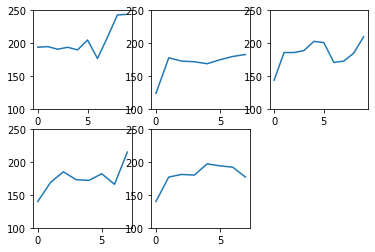

In [63]:
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plot_hypha(i)

### Plot hyphas with standard error

In [64]:
def plot_hypha(i):
    df_hypha = df[df['hypha']==i]
    x = df_hypha['order']
    y = df_hypha['value']
    dy = df_hypha['std_deviation']
    ax = plt.gca()
    ax.set_ylim([100, 250])
    plt.errorbar(x, y, dy)

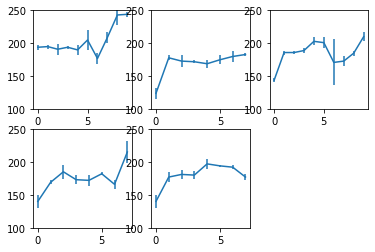

In [66]:
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plot_hypha(i)

### Plot data points

In [56]:
def plot_geometry(i):
    """
    Plot the point where the measure were done in space
    The tip of the hypha has a red dot.
    """
    df_hypha = df[df['hypha']==i]
    x = df_hypha['x']
    y = - df_hypha['y'] # y is inversed in the microscope referential
    plt.plot(x, y, marker="x")
    tip = df_hypha[df_hypha['order']==0]
    plt.plot(tip['x'], -tip['y'], color="red", marker = 'o')

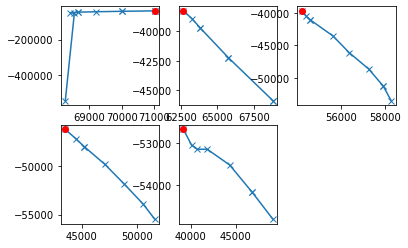

In [57]:
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plot_geometry(i)